--2023-05-31 10:39:33--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.1’

yolov3.weights.1    100%[===================>] 236.52M  20.7MB/s    in 12s     

2023-05-31 10:39:46 (19.3 MB/s) - ‘yolov3.weights.1’ saved [248007048/248007048]

--2023-05-31 10:39:46--  https://github.com/pjreddie/darknet/raw/master/cfg/yolov3.cfg
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg [following]
--2023-05-31 10:39:46--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercon

Saving 1645223618418.jpg to 1645223618418 (1).jpg


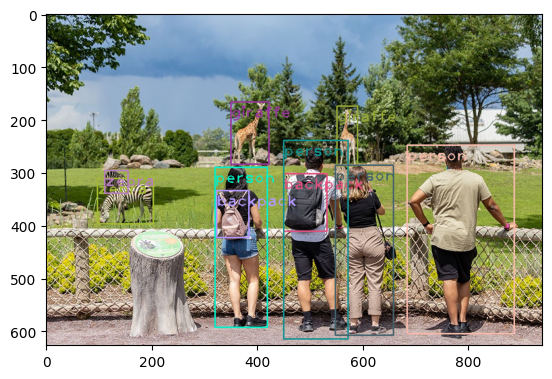

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from google.colab.patches import cv2_imshow

# Download the YOLOv3 weights, configuration and class names
!wget https://pjreddie.com/media/files/yolov3.weights
!wget https://github.com/pjreddie/darknet/raw/master/cfg/yolov3.cfg
!wget https://github.com/pjreddie/darknet/raw/master/data/coco.names

# Upload an image from your local file system
uploaded = files.upload()
image_path = next(iter(uploaded))

# Load YOLOv3
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# Load image
img = cv2.imread(image_path)
height, width, channels = img.shape

# Detect objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

# Load class labels
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Create random color rectangles
colors = np.random.uniform(0, 255, size=(len(classes), 3))

# Draw rectangles and labels on image
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), cv2.FONT_HERSHEY_PLAIN, 2, color, 2)

# Display image in notebook
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

# Or download image
cv2.imwrite('output.png', img)
files.download('output.png')
